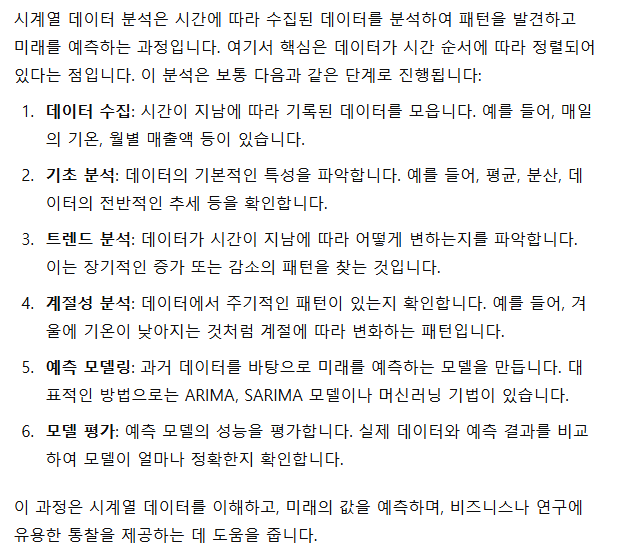

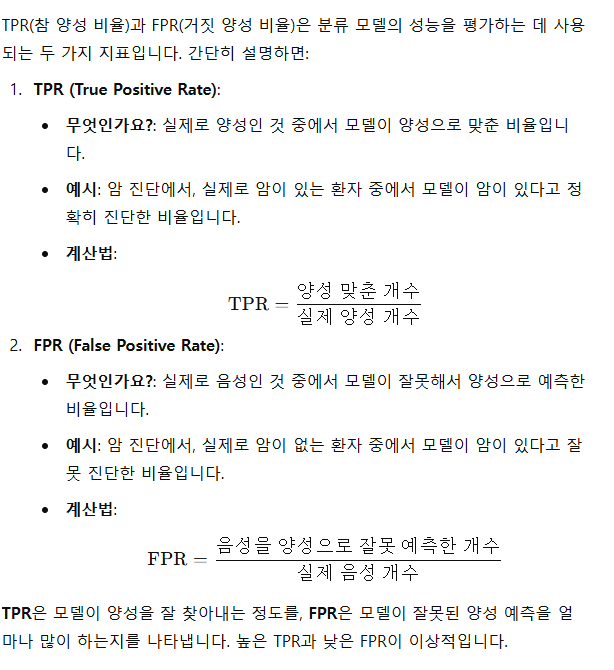

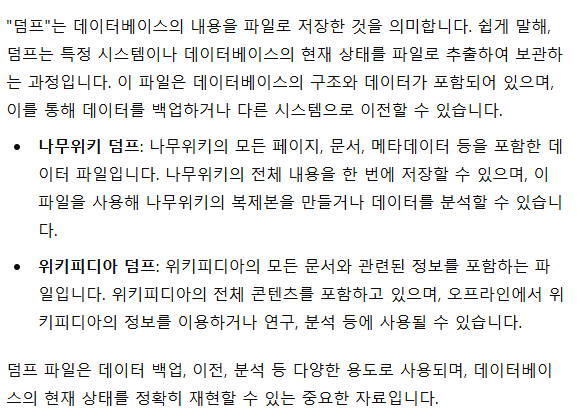

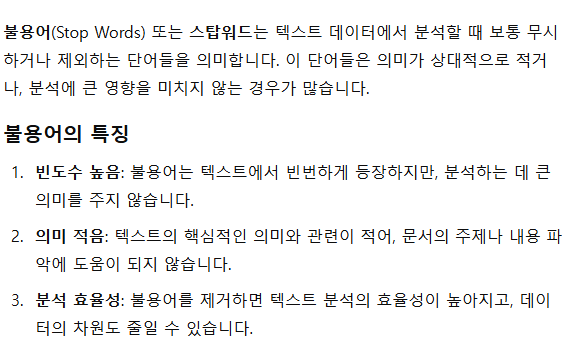

In [1]:
# 1. 텍스트의 토큰화 

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

# 케라스의 텍스트 전처리와 관련한 함수 중 text_to_word_sequence 함수를 불러옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [3]:
# 단어 빈도수 세기

# 전처리하려는 세 개의 문장을 정합니다.
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()            # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
 
# 단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다.
# Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict 클래스를 사용합니다.
print("\n단어 카운트:\n", token.word_counts) 

# 출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇 개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'각': 1, '토큰화합니다': 1, '단어를': 1, '먼저': 1, '텍스트의': 2, '나누어': 1, '인식됩니다': 1, '딥러닝에서': 2, '토큰화해야': 1, '단어로': 1, '수': 1, '결과는': 1, '있습니다': 1, '사용할': 1, '토큰화한': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화합니다': 7, '단어로': 8, '토큰화해야': 9, '인식됩니다': 10, '토큰화한': 11, '결과는': 12, '사용할': 13, '수': 14, '있습니다': 15}


In [4]:
# 2. 단어의 원=핫 인코딩 

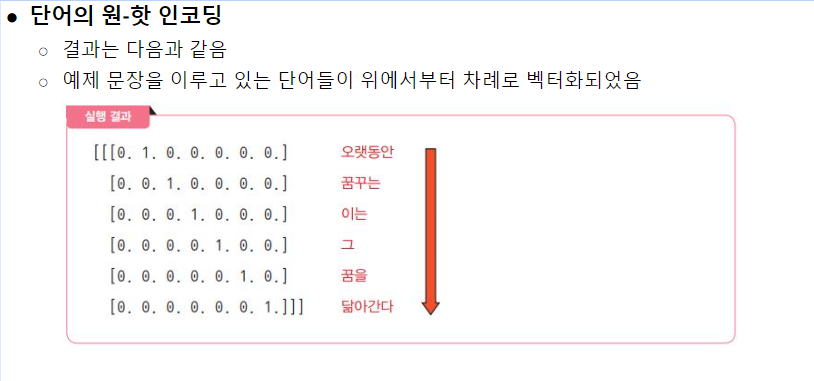

In [5]:
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [6]:
x=token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [7]:
# 인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [8]:
# 단어 임베딩 

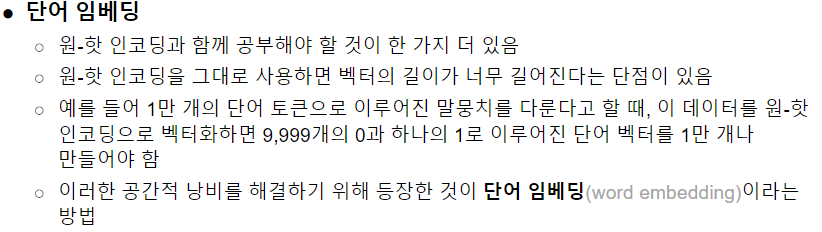

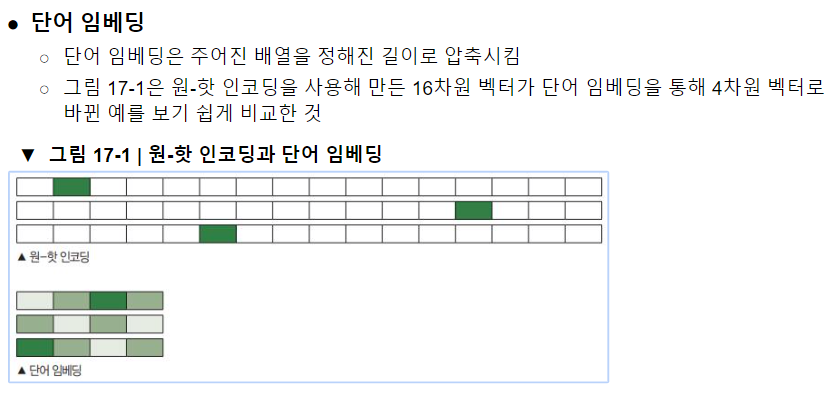

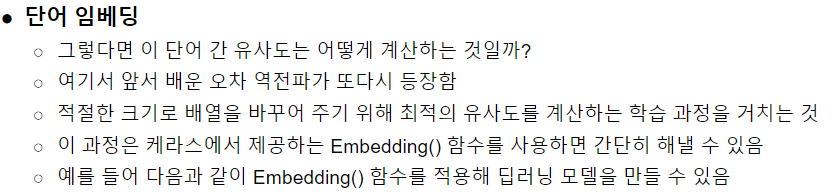

In [9]:
from tensorflow.keras.layers import Embedding


In [10]:
model = Sequential()
model.add(Embedding(16,4))

In [11]:
model

<Sequential name=sequential, built=False>

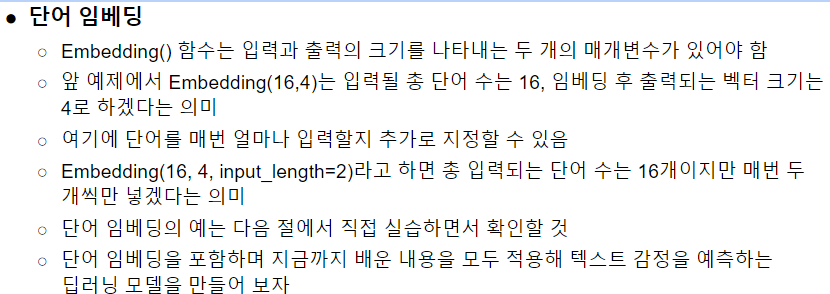

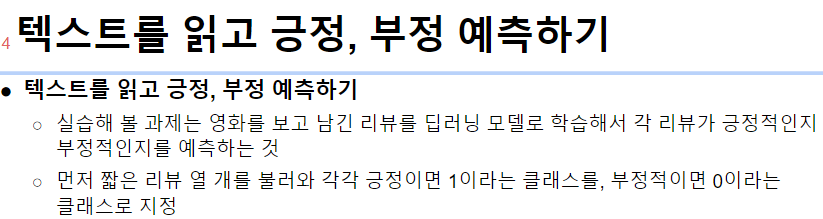

In [12]:
me = ['기분좋다','즐겁다','사랑스럽다',"생각보다 지루하네요","연기가 어색해요","재미없어요"]
label1 = array([1,1,1,0,0,0])
token = Tokenizer()
token.fit_on_texts(me)
print(token.word_index)

{'기분좋다': 1, '즐겁다': 2, '사랑스럽다': 3, '생각보다': 4, '지루하네요': 5, '연기가': 6, '어색해요': 7, '재미없어요': 8}


In [13]:
x1 = token.texts_to_sequences(me)
x1

[[1], [2], [3], [4, 5], [6, 7], [8]]

In [14]:
pad_x1 = pad_sequences(x1,4)
pad_x1

array([[0, 0, 0, 1],
       [0, 0, 0, 2],
       [0, 0, 0, 3],
       [0, 0, 4, 5],
       [0, 0, 6, 7],
       [0, 0, 0, 8]])

In [15]:
# 임베딩에 입력될 단어의 수를 지정합니다.
word_s = len(token.word_index) +1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model1 = Sequential()
model1.add(Embedding(word_s, 8, input_length=4)) # 8은 임의로 정했다.ㅣ 
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

model1.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
model1.fit(pad_x1,label1,epochs=20)
print("\n Accuracy: %.4f" % (model1.evaluate(pad_x1,label1)[1]))

c:\ProgramData\anaconda3\envs\ai3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 0.3333 - loss: 0.6964
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3333 - loss: 0.6953
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3333 - loss: 0.6943
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.6922
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6667 - loss: 0.6911
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6667 - loss: 0.6901
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6890
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: 0.6880
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6667 - loss: 0.6870
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6667 - loss: 0.6859
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6667 - loss: 0.6849


In [16]:
# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
label = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [17]:
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [18]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [19]:
# 임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, label, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, label)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.5000 - loss: 0.6918
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6000 - loss: 0.6896
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7000 - loss: 0.6874
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7000 - loss: 0.6852
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8000 - loss: 0.6831
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9000 - loss: 0.6809
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9000 - loss: 0.6787
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9000 - loss: 0.6766
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 0.6744
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 0.6723
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.6701
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8000 - loss: 0.6679


[실습]영화 리뷰가 긍정적인지 부정정인지 예측하기 

In [21]:
# del model 

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical

from numpy import array

# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
labels = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n", x)

# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)

# 임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) + 1

# 단어 임베딩을 포함해 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()



model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])
model.fit(padded_x, labels, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, labels)[1]))

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6000 - loss: 0.6950
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6000 - loss: 0.6927
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6000 - loss: 0.6904
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6000 - loss: 0.6881
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7000 - loss: 0.6858
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6835
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8000 - loss: 0.6812
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.6790
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6767
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8000 - loss: 0.6744
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9000 - loss: 0.6721
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9000 - loss: 0.6699


In [26]:
!python --version

Python 3.11.9
